# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
data.shape # shape of the dataset

(5391, 6)

In [6]:
data.columns # list of columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [7]:
data.isna().any() # check for NaN values

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [8]:
data.duplicated(subset=['Movie_Title', 'Release_Date']).any() # check for duplicates

True

In [9]:
# Remove Duplicates
data.drop_duplicates(subset=['Movie_Title', 'Release_Date'], inplace=True, ignore_index=True)

In [10]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [11]:
data.dtypes # check for each column's data type

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
# convert columns into integers
data['USD_Production_Budget'] = data['USD_Production_Budget'].apply(lambda x:int(x[1:].replace(',', '')))
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].apply(lambda x:int(x[1:].replace(',', '')))
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].apply(lambda x:int(x[1:].replace(',', '')))
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [13]:
# Convert into datetime
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data['Release_Date']

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5385   2018-10-08
5386   2018-12-18
5387   2020-12-31
5388   2020-12-31
5389   2020-12-31
Name: Release_Date, Length: 5390, dtype: datetime64[ns]

In [14]:
# Check everything again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [15]:
# Check head and tail (for exploration too)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [16]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5385,2950,2018-10-08,Meg,15000000,0,0
5386,126,2018-12-18,Aquaman,160000000,0,0
5387,96,2020-12-31,Singularity,175000000,0,0
5388,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5389,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [17]:
data.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4445,2610,2013-08-16,Jobs,18000000,43402515,16131410
1926,3747,2002-11-29,Rabbit-Proof Fence,7000000,16866928,6199600
3739,2916,2010-09-22,You Will Meet a Tall Dark Stranger,15000000,34247816,3247816
447,3602,1986-08-08,Stand by Me,8000000,52287414,52287414
1735,2021,2001-12-21,Jimmy Neutron: Boy Genius,25000000,102992536,80936232
3945,518,2011-08-07,Zookeeper,80000000,170805525,80360866
5195,11,2016-06-05,Captain America: Civil War,250000000,1151684349,408084349
4035,2322,2011-11-16,The Descendants,20000000,175507800,82624961
4720,4214,2014-11-04,Joe,4000000,373375,373375
3119,3408,2008-03-28,"Run, Fatboy, Run",10000000,33512260,6003262


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [18]:
# Average Production Budget of the films
avg_prod_budget = data['USD_Production_Budget'].mean()
print(f"The Average Production Budget of the films in the dataset is ${avg_prod_budget}")

The Average Production Budget of the films in the dataset is $31119487.807977736


In [19]:
# Average Worlwide Gross Revenue of the films
avg_ww_gross = data['USD_Worldwide_Gross'].mean()
print(f"The Average Worlwide Gross Revenue of the films in the dataset is ${avg_ww_gross}")

The Average Worlwide Gross Revenue of the films in the dataset is $88871907.19870129


In [20]:
# Minimum Worlwide Revenue
min_ww_gross = data['USD_Worldwide_Gross'].min()
print(f'The Minimum Worldwide Gross Revenue of the films in the dataset is ${min_ww_gross}')
# Minimum Domestic Revenue
min_dom_gross = data['USD_Domestic_Gross'].min()
print(f'The Minimum Domestic Gross Revenue of the films in the dataset is ${min_dom_gross}')

The Minimum Worldwide Gross Revenue of the films in the dataset is $0
The Minimum Domestic Gross Revenue of the films in the dataset is $0


In [21]:
# Just realized i can do all that with a simple function
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.25","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [22]:
# Movies with lowest budget
data[data['USD_Production_Budget'] == data['USD_Production_Budget'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [23]:
# Movies with highest budget
data[data['USD_Production_Budget'] == data['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3528,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [24]:
domestic_0_gross = data[data['USD_Domestic_Gross']==0]
domestic_0_gross.count() # Number of films that grossed nothing domestically

Rank                     511
Release_Date             511
Movie_Title              511
USD_Production_Budget    511
USD_Worldwide_Gross      511
USD_Domestic_Gross       511
dtype: int64

In [25]:
# Highest budget film that grossed nothing domestically (highest)
domestic_0_gross[domestic_0_gross['USD_Production_Budget']==domestic_0_gross['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5387,96,2020-12-31,Singularity,175000000,0,0


In [26]:
domestic_0_gross.sort_values('USD_Production_Budget', ascending = False, inplace=True)
domestic_0_gross.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5387,96,2020-12-31,Singularity,175000000,0,0
5386,126,2018-12-18,Aquaman,160000000,0,0
5383,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5384,366,2018-10-08,Amusement Park,100000000,0,0
5089,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [27]:
ww_0_gross = data[data['USD_Worldwide_Gross']==0]
ww_0_gross.count() # Number of films that grossed nothing worldwide

Rank                     356
Release_Date             356
Movie_Title              356
USD_Production_Budget    356
USD_Worldwide_Gross      356
USD_Domestic_Gross       356
dtype: int64

In [28]:
ww_0_gross.sort_values('USD_Production_Budget', ascending = False, inplace=True)
ww_0_gross.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5387,96,2020-12-31,Singularity,175000000,0,0
5386,126,2018-12-18,Aquaman,160000000,0,0
5383,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5384,366,2018-10-08,Amusement Park,100000000,0,0
5337,879,2017-04-08,The Dark Tower,60000000,0,0


### Filtering on Multiple Conditions

In [29]:
international_releases = data[(data['USD_Domestic_Gross']==0) & (data['USD_Worldwide_Gross']!=0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5339,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5347,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5359,4832,2017-07-03,Departure,1100000,27561,0
5371,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [30]:
international_releases2 = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross==0')
international_releases2

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5339,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5347,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5359,4832,2017-07-03,Departure,1100000,27561,0
5371,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [31]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [32]:
# Remove unreleased films
clean_data = data[data['Release_Date']<=scrape_date]
clean_data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5378,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5379,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5380,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5381,1254,2017-12-05,Snatched,42000000,57850343,45850343
5382,2521,2017-12-31,The Thousand Miles,20000000,0,0


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [33]:
lost_money_films = clean_data.query('USD_Production_Budget>USD_Worldwide_Gross')
print(f'Percentage of films where the production costs exceeded the worldwide gross revenue: {(len(lost_money_films)*100)//len(clean_data)} %')

Percentage of films where the production costs exceeded the worldwide gross revenue: 37 %


# Seaborn for Data Viz: Bubble Charts

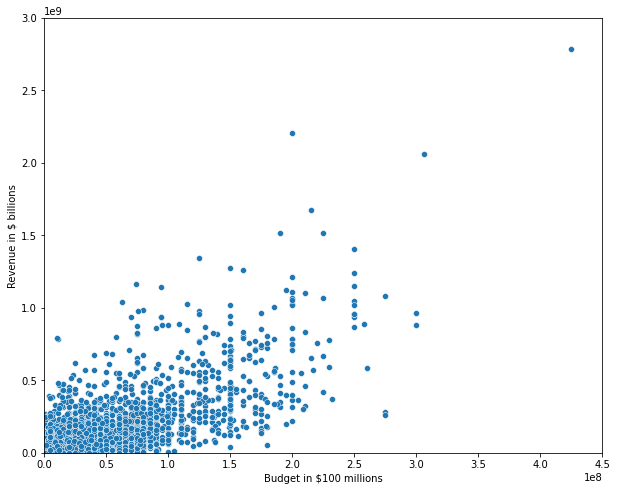

In [34]:
plt.figure(figsize=(10,8))

ax = sns.scatterplot(data=clean_data, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

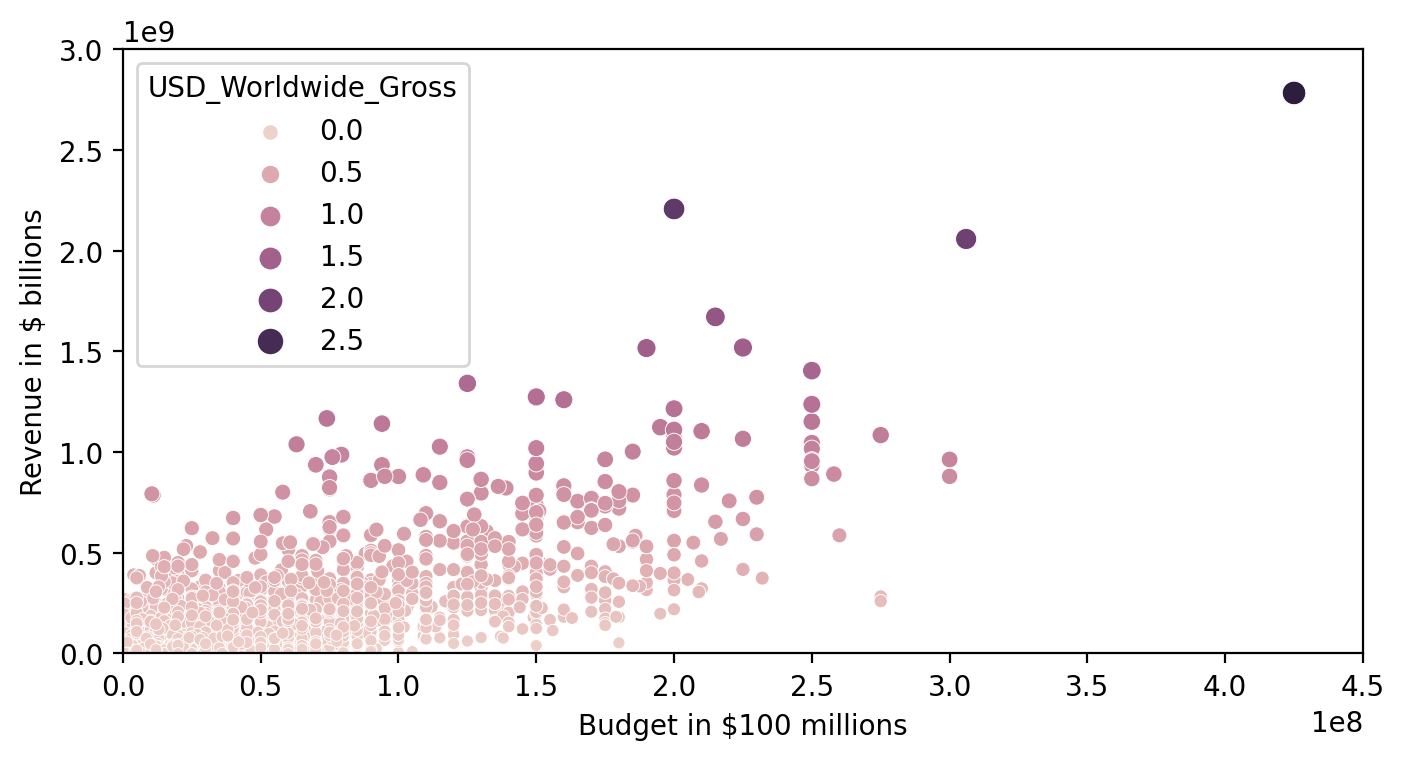

In [35]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=clean_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



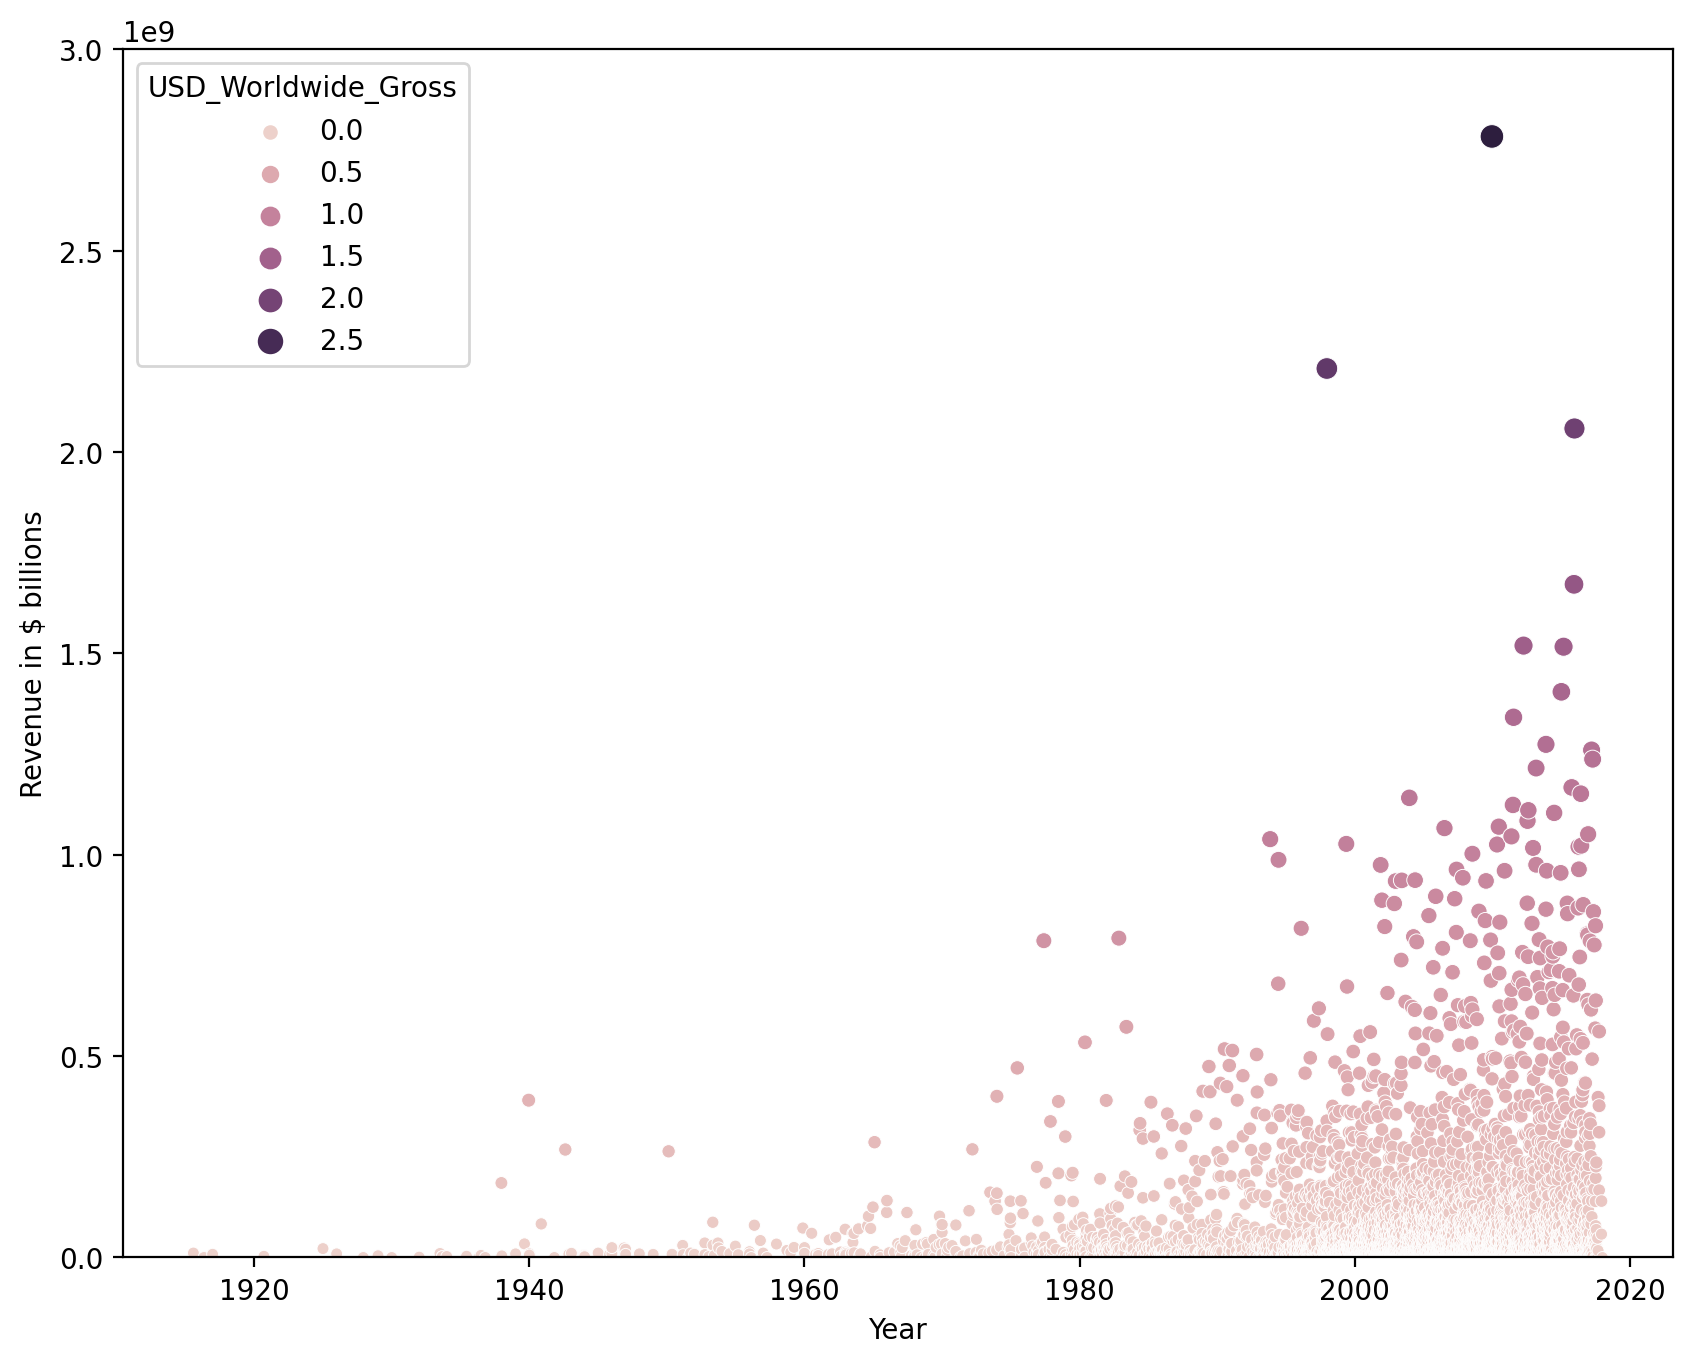

In [36]:
plt.figure(figsize=(10,8), dpi=200)
ax1 = sns.scatterplot(data=clean_data,
                     x='Release_Date', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax1.set(ylim=(0, 3000000000),
       ylabel='Revenue in $ billions',
       xlabel='Year',)
 
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [37]:
# Insert Decade column
decade_col = pd.DatetimeIndex(clean_data['Release_Date']).year
decade_col-=decade_col%10
clean_data.insert(6, 'Decade', decade_col)

In [38]:
clean_data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5378,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5379,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5380,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5381,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010
5382,2521,2017-12-31,The Thousand Miles,20000000,0,0,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [39]:
old_films = clean_data[clean_data['Decade']<1970]
new_films = clean_data[clean_data['Decade']>=1970]

In [40]:
old_films.shape # 153 movies were released prior to 1970

(153, 7)

In [41]:
old_films[old_films['USD_Production_Budget'] == old_films['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


# Seaborn Regression Plots

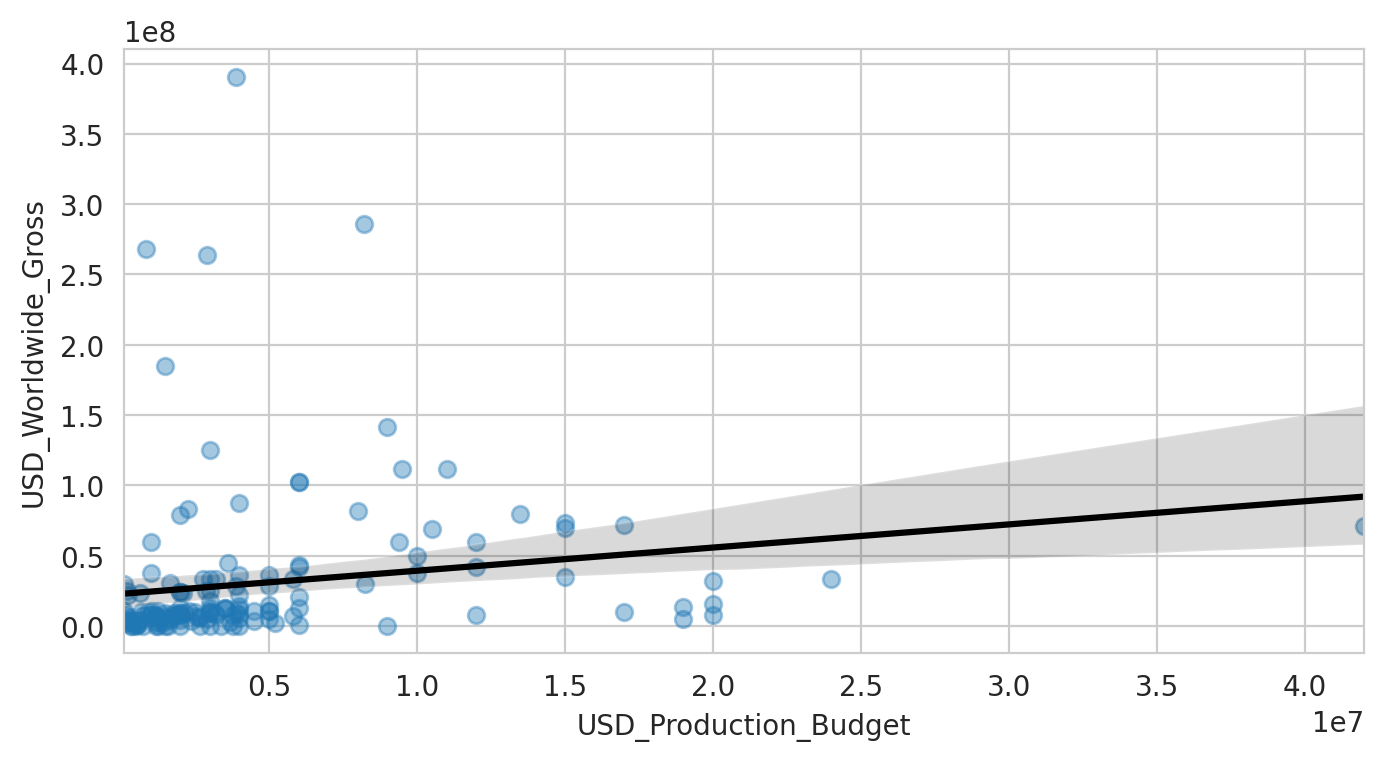

In [42]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(
      data=old_films, 
      x='USD_Production_Budget', 
      y='USD_Worldwide_Gross',
      scatter_kws = {'alpha': 0.4},
      line_kws = {'color': 'black'}
  )

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

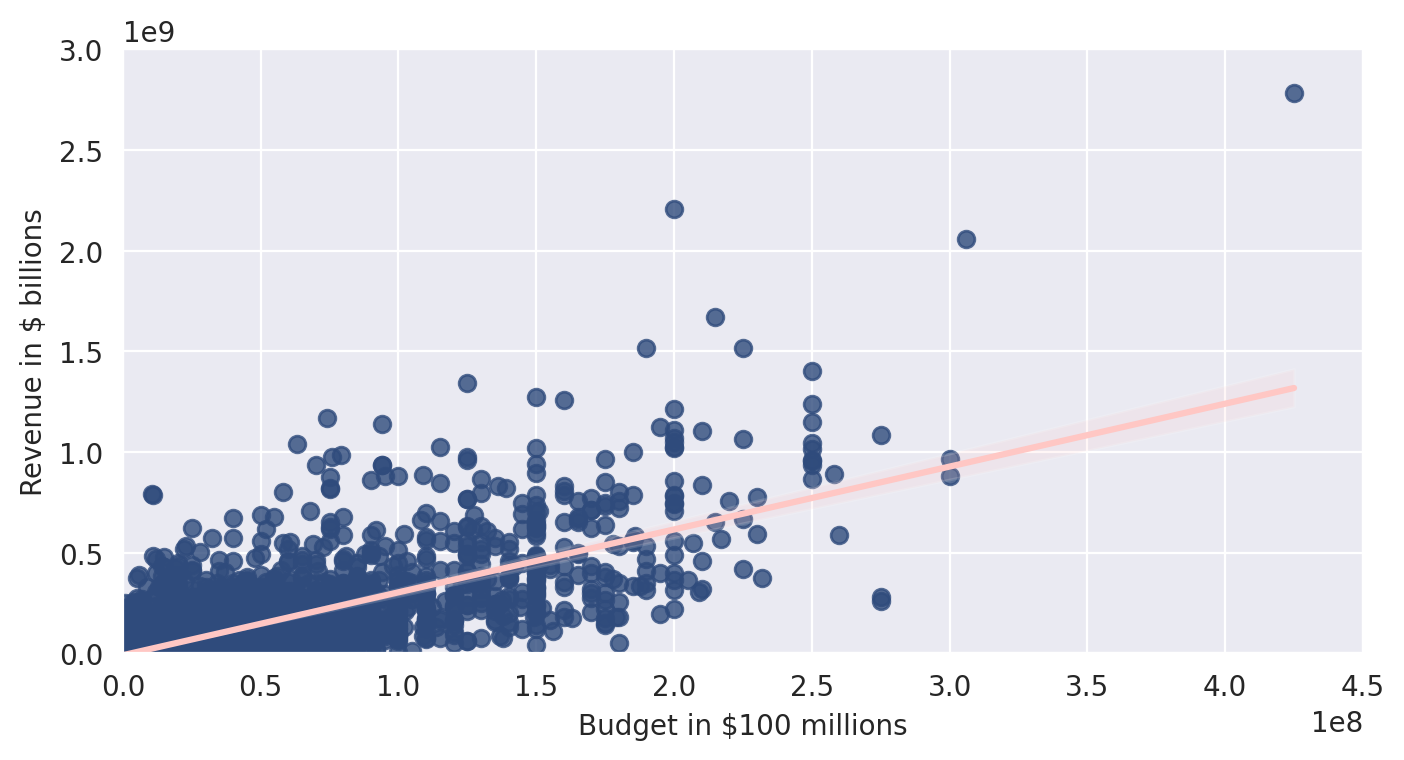

In [43]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(
      data=new_films, 
      x='USD_Production_Budget', 
      y='USD_Worldwide_Gross',
      scatter_kws = {'color': (47/255, 75/255, 124/255, 1)},
      line_kws = {'color': (255/255, 199/255, 196/255, 1)}
  )
  ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [44]:
regression = LinearRegression() # create our own linear regression

In [45]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

# We need to make it into a new dataframe, because the Linear Regression object is not really compatible with series

In [46]:
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
regression.intercept_

array([-8653311.20858923])

In [48]:
regression.coef_

array([[3.12262611]])

In [50]:
regression.score(X,y)

0.5576797626619335

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [52]:
# Explanatory Variable(s) or Feature(s)
x = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
Y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

# We need to make it into a new dataframe, because the Linear Regression object is not really compatible with series

In [53]:
regression.fit(x,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
regression.intercept_

array([22821538.63508039])

In [55]:
regression.coef_

array([[1.64771314]])

In [56]:
regression.score(x,Y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [57]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
